In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
defaulter_df = pd.read_csv("Default.csv")
defaulter_df.head()



,default,student,balance,income
0,No,No,729.526495,44361.62507
1,No,Yes,817.180407,12106.13470
2,No,No,1073.549164,31767.13895
3,No,No,529.250605,35704.49394
4,No,No,785.655883,38463.49588


In [4]:
print('Size of the data :',defaulter_df.shape)

Size of the data : (10000, 4)


In [5]:
x = defaulter_df[["balance", "income"]]
y = defaulter_df["default"]


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
print('Size of training data :',x_train.shape[0])
print('Size of test data :',x_test.shape[0])

Size of training data : 8000
Size of test data : 2000


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
min_max = MinMaxScaler()
min_max.fit(x_train)
train_transformed = min_max.transform(x_train)
transformed = min_max.fit_transform(x_test)
transformed

array([[0.60044261, 0.41419578],
       [0.32278831, 0.57880959],
       [0.        , 0.2640447 ],
       ...,
       [0.01141857, 0.31423418],
       [0.56417888, 0.24950704],
       [0.12493461, 0.6941076 ]])

In [11]:
x_train["balance_normalized"] = train_transformed[:,0]
x_train["income_normalized"] = train_transformed[:,1]
x_train.head()

,balance,income,balance_normalized,income_normalized
9254,1018.568130,34103.87952,0.383739,0.457967
1561,62.170050,28660.74751,0.023422,0.383181
1670,1046.743543,40822.44741,0.394354,0.550278
6087,763.735280,44125.71873,0.287733,0.595664
6669,697.248633,25730.91758,0.262684,0.342926


In [12]:
x_test["balance_normalized"] = transformed[:,0]
x_test["income_normalized"] = transformed[:,1]
x_test.head()

,balance,income,balance_normalized,income_normalized
6252,1435.662933,31507.08928,0.600443,0.414196
4684,771.789347,42139.07027,0.322788,0.578810
1731,0.000000,21809.21851,0.000000,0.264045
4742,113.571264,32803.83265,0.047499,0.434273
4521,1358.132472,49903.59708,0.568017,0.699027


## Fitting KNN

### 1. k=3

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
knn.fit(x_train[['balance_normalized','income_normalized']],y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [15]:
predictions=knn.predict(x_test[['balance_normalized','income_normalized']])
predictions

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [16]:
y_test

6252    No
4684    No
1731    No
4742    No
4521    No
        ..
6412    No
8285    No
7853    No
1095    No
6929    No
Name: default, Length: 2000, dtype: object

# Computing accuracy

In [17]:
from sklearn.metrics import accuracy_score

In [18]:
test_accuracy=accuracy_score(y_test,predictions)
print('Accuracy on test data :',test_accuracy)

Accuracy on test data : 0.96


In [19]:
train_predictions=knn.predict(x_train[['balance_normalized','income_normalized']])
train_accuracy=accuracy_score(y_train,train_predictions)
print('Accuracy on training data :',train_accuracy)

Accuracy on training data : 0.978625


### 2. k=5

In [20]:
knn_5=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn_5.fit(x_train[['balance_normalized','income_normalized']],y_train)
predictions=knn.predict(x_test[['balance_normalized','income_normalized']])
test_accuracy=accuracy_score(y_test,predictions)
print('Accuracy on test data :',test_accuracy)
train_predictions=knn.predict(x_train[['balance_normalized','income_normalized']])
train_accuracy=accuracy_score(y_train,train_predictions)
print('Accuracy on training data :',train_accuracy)

Accuracy on test data : 0.96
Accuracy on training data : 0.978625


## Finding optimal value of k

In [21]:
train_accuracies=[]
test_accuracies=[]
for i in range(1,16,2):
    knn=KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(x_train[['balance_normalized','income_normalized']],y_train)
    predictions=knn.predict(x_test[['balance_normalized','income_normalized']])
    test_accuracy=accuracy_score(y_test,predictions)
    test_accuracies.append(test_accuracy)
    train_predictions=knn.predict(x_train[['balance_normalized','income_normalized']])
    train_accuracy=accuracy_score(y_train,train_predictions)
    train_accuracies.append(train_accuracy)
    

In [22]:
train_accuracies,test_accuracies

([1.0, 0.978625, 0.9755, 0.976375, 0.97475, 0.9745, 0.974375, 0.97475],
 [0.949, 0.96, 0.959, 0.9585, 0.96, 0.9595, 0.957, 0.959])

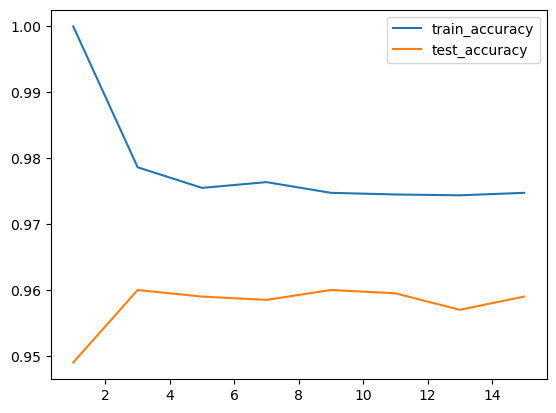

In [23]:
k_values=list(range(1,16,2))
plt.plot(k_values,train_accuracies)
plt.plot(k_values,test_accuracies)
plt.legend(['train_accuracy','test_accuracy'])

## Fitting with initial optimal value of k

In [24]:
knn=KNeighborsClassifier(n_neighbors=9,metric='euclidean')
knn.fit(x_train[['balance_normalized','income_normalized']],y_train)
predictions=knn.predict(x_test[['balance_normalized','income_normalized']])
test_accuracy=accuracy_score(y_test,predictions)
print('Accuracy on test data :',test_accuracy)
train_predictions=knn.predict(x_train[['balance_normalized','income_normalized']])
train_accuracy=accuracy_score(y_train,train_predictions)
print('Accuracy on training data :',train_accuracy)

Accuracy on test data : 0.96
Accuracy on training data : 0.97475


# validation split

### sipmle train and validation split

In [25]:
x_train_new, x_val, y_train_new, y_val = train_test_split(x_train[["balance_normalized","income_normalized"]],y_train, test_size = 0.2, random_state = 42)

In [27]:
print("Size of training data: ", x_train_new.shape[0])
print("Size of validation data : ", x_val.shape[0])

Size of training data:  6400
Size of validation data :  1600


In [28]:
train_accuracies = []
val_accuracies = []
for i in range(1,16,2):
    knn = KNeighborsClassifier(n_neighbors = i, metric = "euclidean")
    knn.fit(x_train_new, y_train_new)
    val_predictions = knn.predict(x_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    val_accuracies.append(val_accuracy)
    train_predictions = knn.predict(x_train_new)
    train_accuracy = accuracy_score(y_train_new, train_predictions)
    train_accuracies.append(train_accuracy)

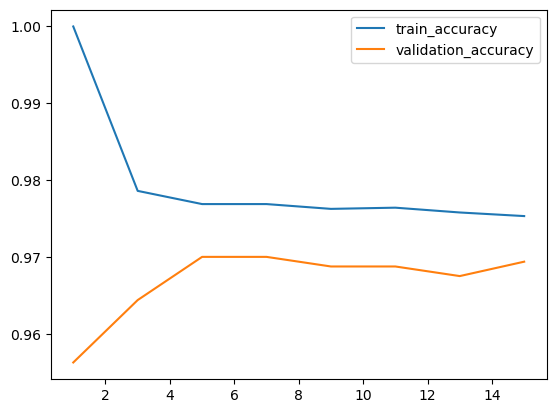

In [29]:
k_values = list(range(1,16,2))
plt.plot(k_values, train_accuracies)
plt.plot(k_values, val_accuracies)
plt.legend(["train_accuracy", "validation_accuracy"])

In [30]:
#fitting with optimla value of k
knn = KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")
knn.fit(x_train_new, y_train_new)
val_predictions = knn.predict(x_val)
val_accuracy = accuracy_score(y_val, val_predictions)
val_accuracy

0.97

In [31]:
predictions = knn.predict(x_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.96

## cross validation

In [32]:
from sklearn.model_selection import cross_validate

In [33]:
knn =  KNeighborsClassifier(n_neighbors = 5, metric = "euclidean")

In [34]:
cv_results = cross_validate(knn, x_train[["balance_normalized","income_normalized"]], y_train, cv=4, return_train_score =True)
cv_results

{'fit_time': array([0.03200769, 0.03213859, 0.0238502 , 0.03200126]),
 'score_time': array([0.34383583, 0.34398961, 0.33613443, 0.33598924]),
 'test_score': array([0.973, 0.972, 0.967, 0.971]),
 'train_score': array([0.9755    , 0.97633333, 0.97683333, 0.97616667])}

In [35]:
print("Training data average accuracy :", cv_results["train_score"].mean()*100)
print("Validation data average accuracy :", cv_results["test_score"].mean()*100)

Training data average accuracy : 97.62083333333334
Validation data average accuracy : 97.075


In [36]:
knn.fit(x_train[["balance_normalized","income_normalized"]], y_train)
predictions = knn.predict(x_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.959

## Hyper parameter tuning using GridSearch

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
knn = KNeighborsClassifier(metric = "euclidean")

In [40]:
param_grid={'n_neighbors':np.arange(1,16,2)}

In [41]:
knn_with_gs = GridSearchCV(knn, param_grid, return_train_score = True, verbose =1, scoring = "accuracy")

In [42]:
knn_with_gs.fit(x_train[["balance_normalized","income_normalized"]], y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=KNeighborsClassifier(metric='euclidean'),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15])},
             return_train_score=True, scoring='accuracy', verbose=1)

In [43]:
knn_with_gs.cv_results_

{'mean_fit_time': array([0.0317781 , 0.02977643, 0.03577394, 0.03477325, 0.03197398,
        0.03137546, 0.03137555, 0.03237619]),
 'std_fit_time': array([0.00306006, 0.00074727, 0.0043061 , 0.00278393, 0.00178699,
        0.00101818, 0.00286769, 0.00682679]),
 'mean_score_time': array([0.24464235, 0.23884759, 0.27462606, 0.34138422, 0.26243362,
        0.28401971, 0.26103535, 0.25063996]),
 'std_score_time': array([0.01930946, 0.00315917, 0.02203627, 0.09108657, 0.00664628,
        0.03552809, 0.01353354, 0.00401792]),
 'param_n_neighbors': masked_array(data=[1, 3, 5, 7, 9, 11, 13, 15],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 7},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13},
  {'n_neighbors': 15}],
 'split0_test_score': array([0.95875 , 0.970625, 0.974375, 0.975   , 0.97625 , 0.97562

In [44]:
tuned_df = pd.DataFrame(knn_with_gs.cv_results_)
tuned_df = tuned_df[["param_n_neighbors","mean_train_score", "mean_test_score"]]
tuned_df

,param_n_neighbors,mean_train_score,mean_test_score
0,1,1.000000,0.955375
1,3,0.978437,0.966750
2,5,0.975938,0.969875
3,7,0.975969,0.970875
4,9,0.975125,0.973250
5,11,0.974781,0.973500
6,13,0.975000,0.973125
7,15,0.974719,0.972625


In [45]:
knn_9 =  KNeighborsClassifier(n_neighbors = 11, metric = "euclidean")
knn_9.fit(x_train[["balance_normalized","income_normalized"]], y_train)
predictions = knn_9.predict(x_test[["balance_normalized","income_normalized"]])
test_accuracy = accuracy_score(y_test, predictions)
test_accuracy

0.9595

## Evaluation measures

#### Confusion matrix

In [46]:
from sklearn.metrics import confusion_matrix 

In [47]:
cm = confusion_matrix(y_test, predictions)
print("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[1890   41]
 [  40   29]]


In [48]:
pd.DataFrame(cm, columns = ["No", "Yes"], index = ["No", "Yes"])

,No,Yes
No,1890,41
Yes,40,29


#### Precision and recall

In [49]:
from sklearn.metrics import precision_score, recall_score

In [50]:
precision_score(y_test,predictions, pos_label = "Yes")

0.4142857142857143

In [51]:
precision_score(y_test,predictions, pos_label = "No")

0.9792746113989638

In [52]:
recall_score(y_test,predictions, pos_label = "Yes")

0.42028985507246375

In [53]:
recall_score(y_test,predictions, pos_label = "No")

0.9787674779906784

### F1 score

In [54]:
from sklearn.metrics import f1_score

In [55]:
f1_score(y_test,predictions,pos_label = "No")

0.9790209790209791

In [57]:
f1_score(y_test,predictions,pos_label = "Yes")

0.4172661870503597

In [58]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.98      0.98      0.98      1931
         Yes       0.41      0.42      0.42        69

    accuracy                           0.96      2000
   macro avg       0.70      0.70      0.70      2000
weighted avg       0.96      0.96      0.96      2000

